In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stdev
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# Ingenieria de Caracteristicas Test

In [49]:
datasetTest = pd.read_csv('test.csv')
datasetTest=datasetTest.drop(['PassengerId'], axis=1)
datasetTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Verificacion de NaN

In [50]:
def getNanColNames(df):
    colnames=df.columns
    cols_con_na=[]
    for col in colnames:
        if(df[col].isnull().sum()>0):
            cols_con_na.append(col)
    return cols_con_na

In [51]:
cols_con_nan=getNanColNames(datasetTest)
cols_con_nan

['Age', 'Fare', 'Cabin']

In [52]:
datasetTest[cols_con_nan].dtypes

Age      float64
Fare     float64
Cabin     object
dtype: object

In [53]:
datasetTest[cols_con_nan].isnull().mean()

Age      0.205742
Fare     0.002392
Cabin    0.782297
dtype: float64

In [54]:
datasetTest=datasetTest.drop(['Cabin'], axis=1)

In [55]:
datasetTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Imputación de medias y medianas (Age)

<AxesSubplot:ylabel='Density'>

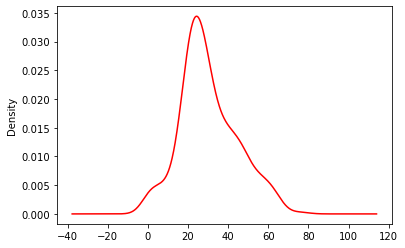

In [56]:
datasetTest['Age'].plot.density(color="red")

In [57]:
meanValue=np.round(datasetTest['Age'].mean(),0)
medianValue=np.round(datasetTest['Age'].median(), 0)
meanValue, medianValue

(30.0, 27.0)

In [58]:
datasetTrain_Age_meanImpo=datasetTest['Age'].fillna(meanValue)
datasetTrain_Age_medianImpo=datasetTest['Age'].fillna(medianValue)

<AxesSubplot:ylabel='Density'>

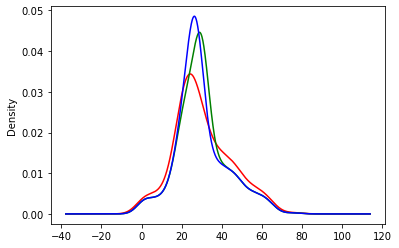

In [59]:
datasetTest['Age'].plot.density(color="red")
datasetTrain_Age_meanImpo.plot.density(color="green")
datasetTrain_Age_medianImpo.plot.density(color="blue")

In [60]:
datasetTest['Age']=datasetTest['Age'].fillna(medianValue)

## Imputación de categorias faltantes

In [61]:
meanValue=np.round(datasetTest['Fare'].mean(),0)
medianValue=np.round(datasetTest['Fare'].median(), 0)
meanValue, medianValue

(36.0, 14.0)

#### Solo el 0.2% de la columna Fare son NaN así que se botan, pero se necesitan subir los registros completos del test a Kaggle 

In [62]:
datasetTest['Fare']=datasetTest['Fare'].fillna(meanValue)

## Codificación de variables categoricas

In [63]:
datasetTest=datasetTest.drop(['Name'], axis=1)
datasetTest=datasetTest.drop(['Ticket'], axis=1)

In [64]:
def getCategoryVars(df):
    colnames=df.columns
    cat_cols=[]
    for col in colnames:
        if(df[col].dtype=='object'):
            cat_cols.append(col)
    return cat_cols

In [65]:
cat_cols=getCategoryVars(datasetTest)
cat_cols

['Sex', 'Embarked']

In [66]:
dataset_categorics=datasetTest[cat_cols]

### Reemplazando la columna Sex por 0 y 1

In [67]:
dataset_categorics['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [68]:
datasetTest["Sex"]=datasetTest["Sex"].replace("female", 0, regex=True)
datasetTest["Sex"]=datasetTest["Sex"].replace("male", 1, regex=True)
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


### Reemplazando la columna Embarked

In [69]:
dataset_categorics['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [70]:
datasetTest["Embarked"]=datasetTest["Embarked"].replace("S", 644, regex=True)
datasetTest["Embarked"]=datasetTest["Embarked"].replace("C", 168, regex=True)
datasetTest["Embarked"]=datasetTest["Embarked"].replace("Q", 77, regex=True)
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,77
1,3,0,47.0,1,0,7.0000,644
2,2,1,62.0,0,0,9.6875,77
3,3,1,27.0,0,0,8.6625,644
4,3,0,22.0,1,1,12.2875,644


## Transformación de variables númericas

In [71]:
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,77
1,3,0,47.0,1,0,7.0000,644
2,2,1,62.0,0,0,9.6875,77
3,3,1,27.0,0,0,8.6625,644
4,3,0,22.0,1,1,12.2875,644


In [72]:
def getContinuesCols(df):
    colnames=df.columns
    numeric_continues_vars=[]
    for col in colnames:
        unique_values=len(df[col].unique())
        if((df[col].dtype!="object")and(unique_values>30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [73]:
numeric_cont_vars=getContinuesCols(datasetTest)
numeric_cont_vars

['Age', 'Fare']

In [74]:
def plot_density_variable(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

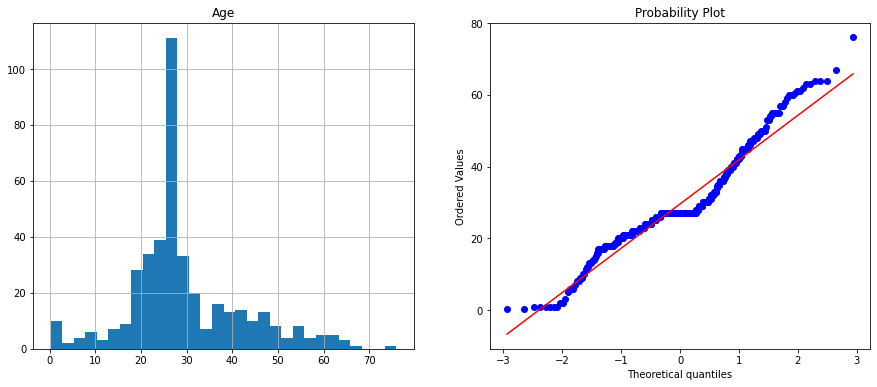

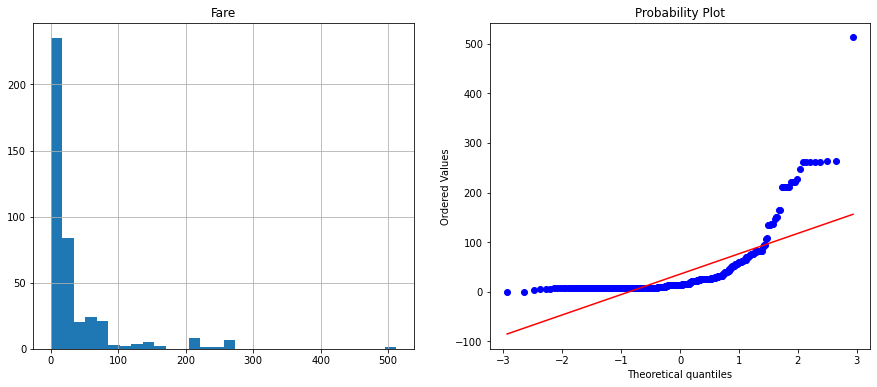

In [75]:
for col in numeric_cont_vars:
    plot_density_variable(datasetTest, col)

### Transformación BoxCox

In [76]:
dataset_temp=datasetTest

#### Age

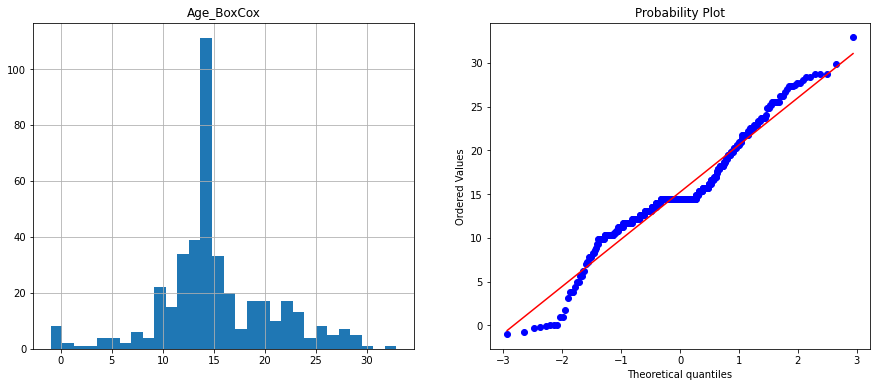

In [77]:
dataset_temp['Age_BoxCox'], lambdaX=stats.boxcox(dataset_temp['Age'])
plot_density_variable(dataset_temp,'Age_BoxCox')

In [78]:
datasetTest['Age']=dataset_temp['Age_BoxCox']
datasetTest=datasetTest.drop(['Age_BoxCox'], axis=1)

In [79]:
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,17.604619,0,0,7.8292,77
1,3,0,22.540377,1,0,7.0000,644
2,2,1,28.045152,0,0,9.6875,77
3,3,1,14.427779,0,0,8.6625,644
4,3,0,12.186132,1,1,12.2875,644


#### Fare

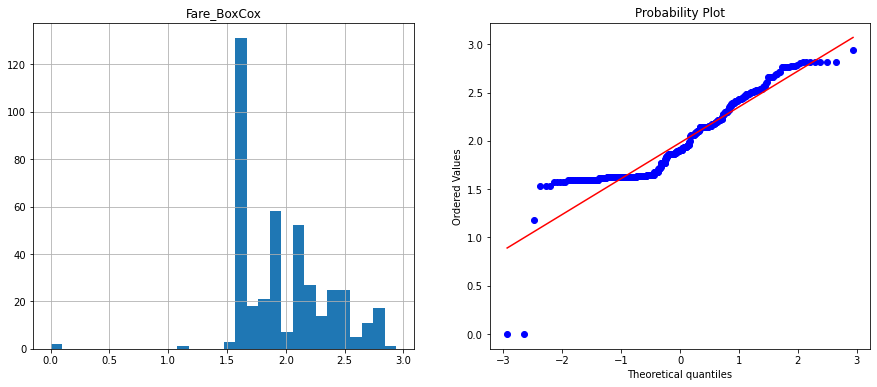

In [80]:
dataset_temp['Fare_BoxCox'], lambdaX=stats.yeojohnson(dataset_temp['Fare'])
plot_density_variable(dataset_temp,'Fare_BoxCox')

In [81]:
datasetTest['Fare']=dataset_temp['Fare_BoxCox']

In [82]:
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,17.604619,0,0,1.628573,77
1,3,0,22.540377,1,0,1.574379,644
2,2,1,28.045152,0,0,1.729353,77
3,3,1,14.427779,0,0,1.676832,644
4,3,0,12.186132,1,1,1.837826,644


## Outliers y Capping

In [83]:
def inspect_outliers(df,variable):
    plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    sns.distplot(df[variable],bins=30)
    plt.title("Densisd-Histogram: "+col)
    
    plt.subplot(132)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.title("QQ-Plot:"+col)
    
    plt.subplot(133)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot:"+col)
    
    plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


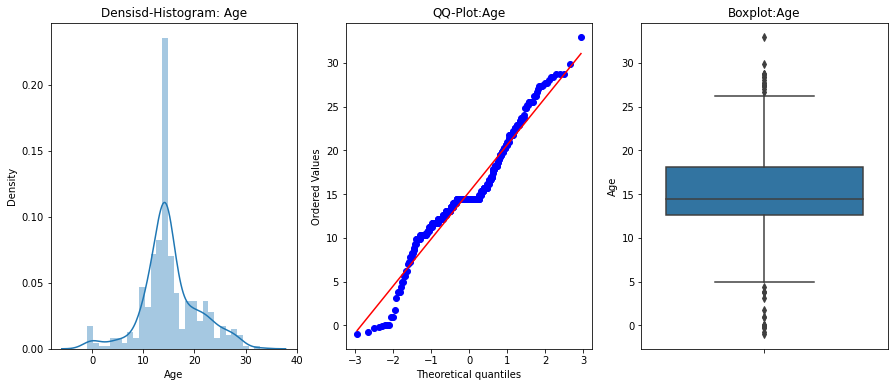

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


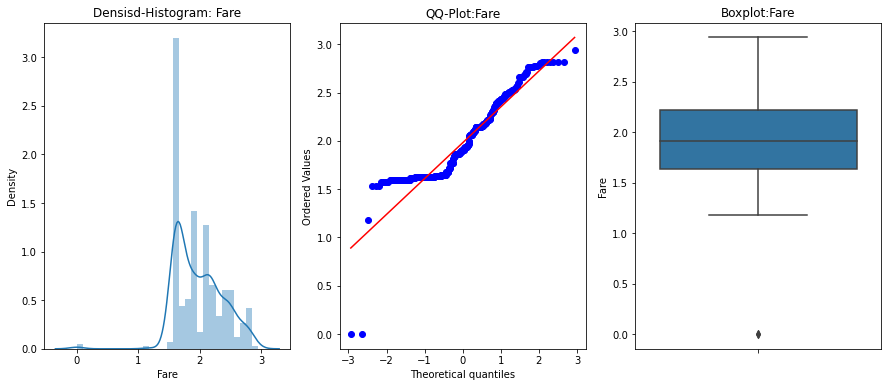

In [84]:
for col in numeric_cont_vars:
    inspect_outliers(datasetTest,col)

In [85]:
def detect_outliers(df,variable,factor):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    LI=df[variable].quantile(0.25)-(IQR*factor)
    LS=df[variable].quantile(0.75)+(IQR*factor)
    return LI,LS

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


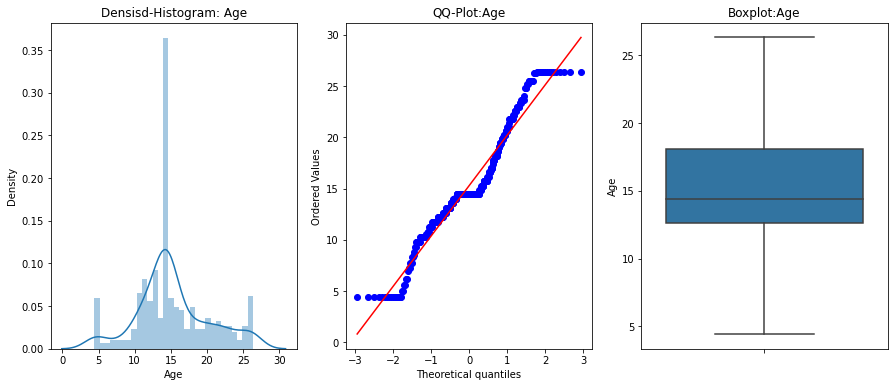

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


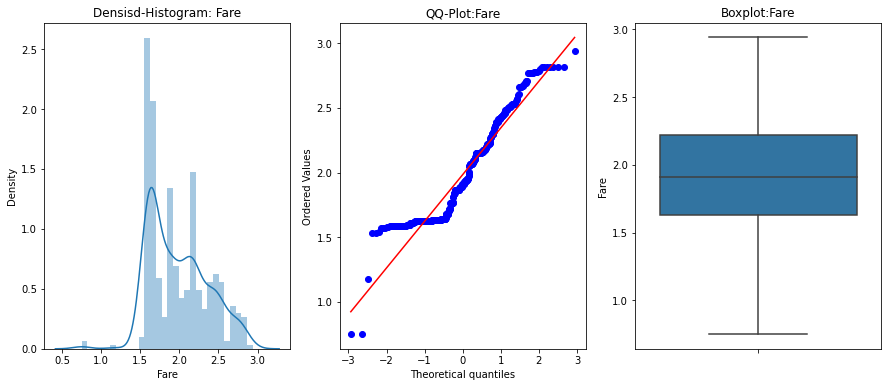

In [86]:
for col in numeric_cont_vars:
    limites=detect_outliers(datasetTest,col,1.5)
    LF_LI, LF_LS=limites
    datasetTest[col]=np.where(datasetTest[col]>LF_LS,LF_LS,
                                        np.where(datasetTest[col]<LF_LI,LF_LI, datasetTest[col]))
    inspect_outliers(datasetTest,col)

## Feature Scaling

In [87]:
#dataset_temp=datasetTest.loc[:,numeric_cont_vars]

In [88]:
#scaler=StandardScaler()
#scaler.fit(dataset_temp) 

In [89]:
#dataset_temp_scaled=pd.DataFrame(scaler.transform(dataset_temp),columns=dataset_temp.columns)

In [90]:
#np.round(dataset_temp_scaled.describe(),2)

In [91]:
#datasetTest.loc[:,numeric_cont_vars]=dataset_temp_scaled

In [93]:
datasetTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,17.604619,0,0,1.628573,77
1,3,0,22.540377,1,0,1.574379,644
2,2,1,26.324252,0,0,1.729353,77
3,3,1,14.427779,0,0,1.676832,644
4,3,0,12.186132,1,1,1.837826,644


In [95]:
datasetTest.to_csv(r'FE_Test.csv', index=False)